<a href="https://www.kaggle.com/code/sahilr05/apple-leaves-disease?scriptVersionId=106028161" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/1021.JPG.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/3090.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/2072.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/5097.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/3013.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/3074.JPG.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/1089.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/1083.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/5071.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/5074.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/2096.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/2050.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/4065.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/4027.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF B

**Import Library**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2022-09-19 13:08:57.855984: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


**Get All Images**

In [3]:
li = os.listdir("/kaggle/input/d-kap/APPLE_DISEASE_DATASET/")
image_list=[]

for i in li:
    for j in os.listdir("/kaggle/input/d-kap/APPLE_DISEASE_DATASET/"+i):
        image_list.append("/kaggle/input/d-kap/APPLE_DISEASE_DATASET/"+i+"/"+j)

In [4]:
len(image_list)

419

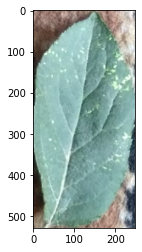

In [5]:
img0 = plt.imread(image_list[0])
plt.imshow(img0)

In [6]:
label = []
x = []
y = []

for i in li:
    label.append(i)
    for j in os.listdir("/kaggle/input/d-kap/APPLE_DISEASE_DATASET/"+i):
        image = cv2.imread("/kaggle/input/d-kap/APPLE_DISEASE_DATASET/"+i+"/"+j)
        image = cv2.resize(image,(300,300))
        x.append(image)
        y.append(i)
        
x = np.array(x)
y = np.array(y)

In [7]:
y_new = []
for i in y:
    y_new.append(label.index(i))
yc = y_new
yc = tf.keras.utils.to_categorical(yc)

In [8]:
x.shape, y.shape

((419, 300, 300, 3), (419,))

**Split Data**

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test = train_test_split(x,yc,test_size=0.4,random_state=123,shuffle=True,)

scale Image size 
- image color between 0 to 255
- every image divided by 255 so scale between 0 to 1

In [10]:
x_train = x_train/255
x_test = x_test/255

> Data Augmentation

In [11]:
data_augmention = keras.Sequential(
                [
                    layers.experimental.preprocessing.RandomContrast(0.5),
                    layers.experimental.preprocessing.RandomRotation(0.4),
                    layers.experimental.preprocessing.RandomZoom(0.3)
                ]
)

2022-09-19 13:09:10.530982: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-19 13:09:10.534997: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-09-19 13:09:10.623681: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-19 13:09:10.628082: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-09-19 13:09:10.628149: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-09-19 13:09:10.667298: I tensorflow/stream_executor/platform/def

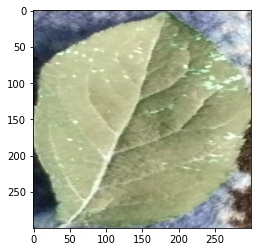

In [12]:
plt.imshow(x[0])

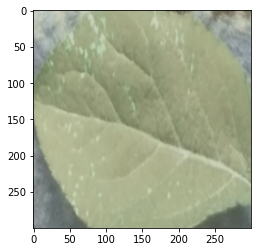

In [13]:
plt.imshow(data_augmention(x)[0].numpy().astype("uint8"))

> **Model Create**

In [14]:
model = Sequential([
    data_augmention,
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    layers.Flatten(input_shape=(300,300,3)),
    layers.Dense(1000,activation="relu"),
    layers.Dense(250,activation="relu"),
    layers.Dense(50,activation="relu"),
    layers.Dense(4,activation="sigmoid"),
])

model.compile(optimizer="adam",
             loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])
epochs = 100
hist = model.fit(x_train,y_train,epochs=epochs)

2022-09-19 13:09:15.448905: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-09-19 13:09:15.463419: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/100


2022-09-19 13:09:16.971968: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-09-19 13:09:18.152565: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-09-19 13:09:18.191770: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


8/8 [==============================] - 11s 129ms/step - loss: 1.4545 - accuracy: 0.2843
Epoch 2/100
8/8 [==============================] - 0s 51ms/step - loss: 1.3195 - accuracy: 0.4150
Epoch 3/100
8/8 [==============================] - 0s 57ms/step - loss: 1.3534 - accuracy: 0.2728
Epoch 4/100
8/8 [==============================] - 0s 57ms/step - loss: 1.3235 - accuracy: 0.3270
Epoch 5/100
8/8 [==============================] - 0s 53ms/step - loss: 1.2253 - accuracy: 0.3922
Epoch 6/100
8/8 [==============================] - 0s 58ms/step - loss: 1.1485 - accuracy: 0.4456
Epoch 7/100
8/8 [==============================] - 0s 56ms/step - loss: 1.1677 - accuracy: 0.4507
Epoch 8/100
8/8 [==============================] - 0s 56ms/step - loss: 1.1510 - accuracy: 0.4522
Epoch 9/100
8/8 [==============================] - 1s 77ms/step - loss: 1.1448 - accuracy: 0.3946
Epoch 10/100
8/8 [==============================] - 0s 62ms/step - loss: 1.1445 - accuracy: 0.4149
Epoch 11/100
8/8 [===========

In [15]:
model.evaluate(x_test,y_test)
#     epoch 100 =  loss: 1.2515 - accuracy: 0.5417
#     epoch 120 =  lloss: 1.3390 - accuracy: 0.5179
#     epoch 200 =  loss: 1.2459 - accuracy: 0.4643
#     epoch 185 =  loss: 1.7032 - accuracy: 0.5417
#     epoch 175 =   accuracy: 0.148
#     epoch 165 =   loss: 1.2344 - accuracy: 0.5119

6/6 [==============================] - 1s 45ms/step - loss: 1.2241 - accuracy: 0.4702


[1.2241108417510986, 0.4702380895614624]

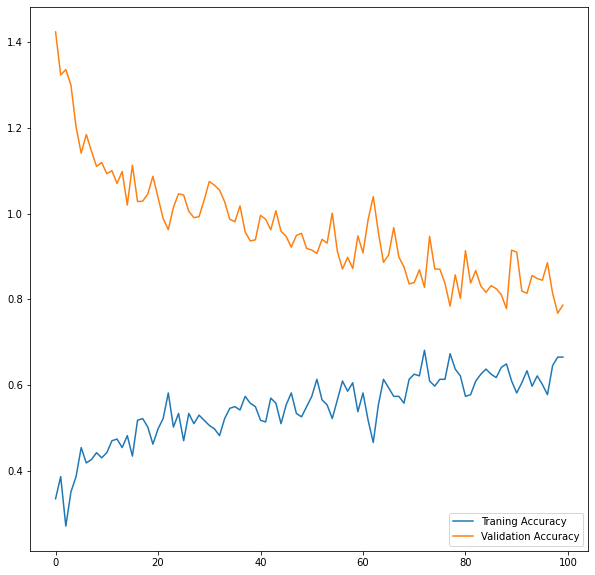

In [16]:
acc = hist.history["accuracy"]
loss = hist.history["loss"]
plt.figure(figsize=(10,10))
plt.plot(range(epochs),acc,label="Traning Accuracy")
plt.plot(range(epochs),loss,label="Validation Accuracy")

plt.legend(loc="lower right")

**Testing**

In [17]:
t_i=["/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/4000.jpg.jpeg",
     "/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/5049.jpg.jpeg",
     "/kaggle/input/d-kap/APPLE_DISEASE_DATASET/HEALTHY LEAVES/1041.JPG.jpeg"
     ]
try_image = cv2.imread(t_i[2])
try_image = cv2.resize(try_image,(300,300))
sz = np.array([try_image])
label[np.argmax(model.predict(sz))]

'LEAF BLOTCH'

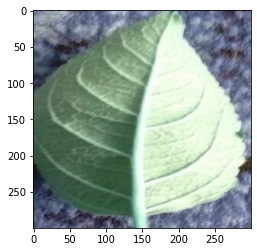

In [18]:
plt.imshow(try_image)

Model 2

In [19]:
!pip install split-folders

import splitfolders
splitfolders.ratio("/kaggle/input/d-kap/APPLE_DISEASE_DATASET/", output="./",
    seed=1337, ratio=(.7, .1, .2), group_prefix=None, move=False)

Copying files: 419 files [00:00, 628.51 files/s]


In [20]:
imgGen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
    vertical_flip=True,
)

train_img_gen = imgGen.flow_from_directory("./train",target_size=(300,300),batch_size=32,class_mode="sparse",)
test_img_gen= imgGen.flow_from_directory("./test",target_size=(300,300),batch_size=32,class_mode="sparse",)
val_img_gen = imgGen.flow_from_directory("./val",target_size=(300,300),batch_size=32,class_mode="sparse",)

model = Sequential([
    layers.InputLayer(input_shape=(300, 300, 3)),
    layers.Conv2D(132,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(90,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
#     layers.Conv2D(128,kernel_size=(3,3),activation="relu"),
#     layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
#     layers.Dense(364,activation="relu"),
    layers.Dense(200,activation="relu"),
    layers.Dense(4,activation="sigmoid"),
])

Found 292 images belonging to 4 classes.
Found 87 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [21]:
model.compile(
    optimizer="adam",
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
epochs = 50
history = model.fit(train_img_gen,
                    steps_per_epoch=9,
                    batch_size=32,
                    validation_data=val_img_gen,
                    validation_steps=1,
                    epochs=epochs)

score = model.evaluate(test_img_gen)
score

Epoch 1/50
9/9 [==============================] - 12s 1s/step - loss: 1.3822 - accuracy: 0.2656 - val_loss: 1.3074 - val_accuracy: 0.4375
Epoch 2/50
9/9 [==============================] - 9s 999ms/step - loss: 1.3167 - accuracy: 0.4152 - val_loss: 1.3574 - val_accuracy: 0.3750
Epoch 3/50
9/9 [==============================] - 10s 1s/step - loss: 1.3443 - accuracy: 0.3817 - val_loss: 1.3267 - val_accuracy: 0.4062
Epoch 4/50
9/9 [==============================] - 9s 977ms/step - loss: 1.3234 - accuracy: 0.3707 - val_loss: 1.3105 - val_accuracy: 0.4062
Epoch 5/50
9/9 [==============================] - 9s 1s/step - loss: 1.2990 - accuracy: 0.3879 - val_loss: 1.3234 - val_accuracy: 0.3438
Epoch 6/50
9/9 [==============================] - 8s 923ms/step - loss: 1.3246 - accuracy: 0.3447 - val_loss: 1.4200 - val_accuracy: 0.2812
Epoch 7/50
9/9 [==============================] - 10s 1s/step - loss: 1.2693 - accuracy: 0.3923 - val_loss: 1.3029 - val_accuracy: 0.3750
Epoch 8/50
9/9 [=============

[1.0811675786972046, 0.48275861144065857]

- 10 epoch  = [1.0032591819763184, 0.4597701132297516]
- 15 epoch  = [1.0492666959762573, 0.517241358757019]
- 25 epoch  = [1.1794607639312744, 0.49425286054611206]
- 50 epoch  = [1.4692052602767944, 0.6091954112052917]

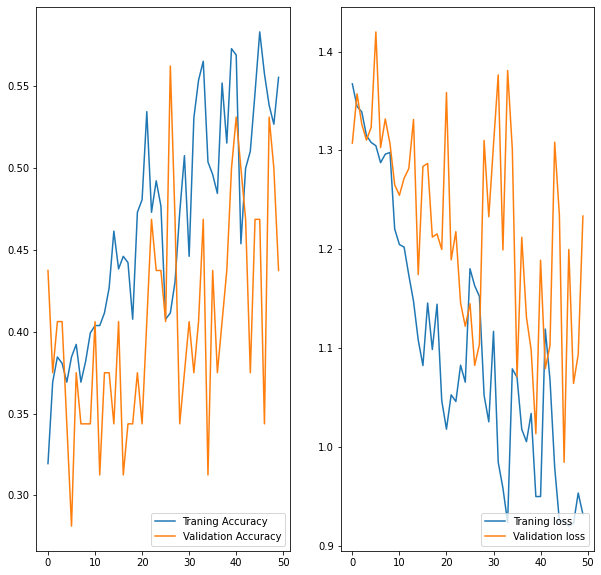

In [22]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label="Traning Accuracy")
plt.plot(range(epochs),val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")


plt.subplot(1,2,2)
plt.plot(range(epochs),loss,label="Traning loss")
plt.plot(range(epochs),val_loss,label="Validation loss")
plt.legend(loc="lower right")


> **Test Model 2**

In [23]:
url="https://cpb-us-e1.wpmucdn.com/blogs.cornell.edu/dist/7/7077/files/2018/09/20180924_134356-t8n88f-576x1024.jpg"
from skimage import io

im = io.imread(url)

try_image = io.imread(url) #cv2.imread(im)
try_image = cv2.resize(try_image,(300,300))
sz = np.array([try_image])
label[np.argmax(model.predict(sz))]

'LEAF BLOTCH'

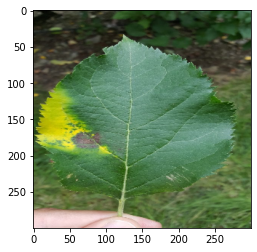

In [24]:
plt.imshow(try_image)